# Dataset other_train.csv
#### Anton Rusňák, František Gič

In [249]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
%matplotlib inline

data = pd.read_csv("data/other_train.csv",sep=",")

## Opis dát:

Dataset obsahuje informácie o osobách, ich adresu bydliska.<br>
<br>Oproti prvému datasetu obsahuje navyše agregované medicínske dáta napríklad o úrovniach glukózy alebo kyslíku v krvi.
<br>Taktiež dáta súkromného charakteru ako vzťah, úroveň vzdelania, tehotenstvo alebo pracovného charakteru ako počet odpracovaných hodín za týždeň alebo zárobok.
<br>Spoločné atribúty majú tieto datasety iba atribúty name a address , na základe týchto atribútov ich budeme môcť mergovať.
<br><br>
Obsahuje 3982 záznamov (riadkov okrem hlavičky) a 22 atribútov.

In [250]:
data.columns

Index(['Unnamed: 0', 'name', 'address', 'kurtosis_oxygen', 'pregnant',
       'education-num', 'relationship', 'skewness_glucose', 'mean_glucose',
       'std_oxygen', 'capital-gain', 'skewness_oxygen', 'kurtosis_glucose',
       'personal_info', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'mean_oxygen', 'hours-per-week', 'capital-loss'],
      dtype='object')

In [251]:
print('Počet stĺpcov : ',data.shape[1] , '\nPočet riadkov: ', data.shape[0])

Počet stĺpcov :  22 
Počet riadkov:  3983


In [252]:
data.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,Alex Chinzi,"590 Samantha Bridge Apt. 572\r\nNorth Allison,...",8.286599,f,16.0,Husband,0.234418,107.484375,15.072284,...,0.362969,Prof-specialty|United-States\r\r\nMarried-civ-...,Doctorate,320102.0,0.0,44.487706,>50K,2.448161,50.0,0.0
1,1,Scott Bass,"5384 Hurst Groves Apt. 092\r\nFreemanview, SD ...",6.455860,f,13.0,Own-child,0.151130,140.203125,21.925411,...,-0.170101,Prof-specialty|United-States\r\r\nNever-marrie...,Bachelors,148300.0,0.0,44.586531,<=50K,4.445652,15.0,0.0
2,2,Chuck Lao,USS Scott\r\nFPO AE 78885,11.513491,f,9.0,Unmarried,-0.024384,124.054688,11.822427,...,-0.026966,Other-service|Mexico\r\r\nSeparated -- Private...,HS-grad,190885.0,0.0,45.904165,<=50K,1.890468,40.0,0.0
3,3,Floyd Squires,"122 Ryan Ranch Suite 621\r\nPort Douglas, NM 0...",7.641796,f,13.0,Not-in-family,-0.564287,115.046875,22.965651,...,0.269421,Prof-specialty|Canada\r\r\nNever-married -- Pr...,Bachelors,191385.0,0.0,58.140302,<=50K,3.639632,40.0,0.0
4,4,Kenneth Cadet,"30930 Ryan Groves\r\nKatelynside, MS 75220",8.826058,f,9.0,Husband,0.495896,93.335938,13.777158,...,0.537549,Sales|United-States\r\r\nMarried-civ-spouse --...,HS-grad,226875.0,0.0,45.605865,<=50K,2.510870,40.0,0.0


Opäť, ako aj pri prvom dataset je z výpisu DataFrame.head() jasné, že prvý, nepomenovaný stĺpec je v datasete použitý ako index, preto ho môžme odstrániť.

In [253]:
data = data.drop(data.columns[0],axis=1)

## Opis atribútov:
Atribúty datasetu sú stringy aj floaty.

In [254]:
data.dtypes

name                 object
address              object
kurtosis_oxygen     float64
pregnant             object
education-num       float64
relationship         object
skewness_glucose    float64
mean_glucose        float64
std_oxygen          float64
capital-gain        float64
skewness_oxygen     float64
kurtosis_glucose    float64
personal_info        object
education            object
fnlwgt              float64
class               float64
std_glucose         float64
income               object
mean_oxygen         float64
hours-per-week      float64
capital-loss        float64
dtype: object

Dataset taktiež obsahuje zopár chýbajúcich hodnôt.<br>
Z výpisu je možné vidieť, že nie všetky atribúty obsahujú hodnoty.

In [255]:
print("Dataset obsahuje celkovo %d chýbajúcich hodnôt"%int(data.shape[0] - data.dropna().shape[0]))

Dataset obsahuje celkovo 76 chýbajúcich hodnôt


In [256]:
data.isnull().sum()

name                 0
address              0
kurtosis_oxygen      5
pregnant            12
education-num       18
relationship        13
skewness_glucose    23
mean_glucose        10
std_oxygen          14
capital-gain        16
skewness_oxygen     13
kurtosis_glucose    18
personal_info       12
education           12
fnlwgt              13
class               19
std_glucose         12
income              14
mean_oxygen         16
hours-per-week      13
capital-loss        20
dtype: int64

## Deskriptívne štatistiky 

In [257]:
data.describe()

,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3978.000000,3965.000000,3960.000000,3973.000000,3969.000000,3967.000000,3970.000000,3965.000000,3970.000000,3964.000000,3971.000000,3967.000000,3970.000000,3963.000000
mean,7.414473,10.084489,4.242530,101.248940,31.148558,1042.988908,91.370712,0.950507,192967.197985,0.255298,74.479764,18.470601,40.568766,80.275549
std,4.811907,2.588918,9.706012,33.601519,22.263993,7006.726961,108.475749,1.611069,103285.567216,0.436083,1448.165852,34.808695,12.601133,388.336046
min,-2.597872,1.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,19214.000000,0.000000,-8305.388133,0.213211,1.000000,0.000000
25%,3.630716,9.000000,-0.120081,87.742188,15.024700,0.000000,12.858504,0.072144,120960.000000,0.000000,39.502222,2.061873,40.000000,0.000000
50%,7.784802,10.000000,0.374657,110.664062,20.547873,0.000000,68.623477,0.310372,182045.000000,0.000000,45.928079,3.223244,40.000000,0.000000
75%,10.278883,12.000000,2.091543,124.132812,43.253607,0.000000,127.236918,0.775684,241631.000000,1.000000,51.048246,12.610786,45.000000,0.000000
max,34.539844,16.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,889965.000000,1.000000,6649.471314,217.371238,99.000000,3770.000000


## Opis atribútov a identifikácia chýb:

Atribút **kurtosis_oxygen**
 - je to spojitý číselný atribút nad ktorým môžme vykonávať deskriptívnu štatistiku
 - je to koeficient špicatosti distribúcie dát o hodnote kyslíku v krvi daného pacienta
 - atribút je typu float
 - obsahuje chýbajúce hodnoty, vhodnou korekciou je nahradenie prázdnych hodnôt mediánom
 

In [258]:
print("Počet chýbajúcich hodnôt v atribúte kurtosis_oxygen: %d"%data.kurtosis_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte kurtosis_oxygen: 5


In [259]:
data.kurtosis_oxygen.describe()

count    3978.000000
mean        7.414473
std         4.811907
min        -2.597872
25%         3.630716
50%         7.784802
75%        10.278883
max        34.539844
Name: kurtosis_oxygen, dtype: float64

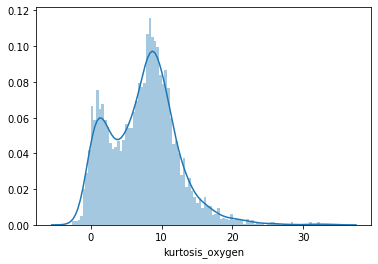

In [260]:
sns.distplot(data.kurtosis_oxygen.dropna(),bins=100)

Podľa distplotu vidíme, že dáta nemajú normálne rozdelenie.

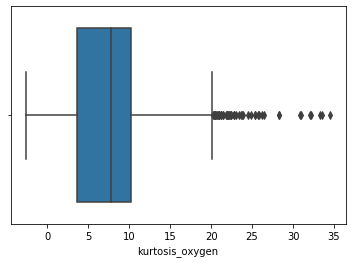

In [261]:
sns.boxplot(data.kurtosis_oxygen.dropna())

Na boxplote je možno vidieť, že kurtosis_oxygen obsahuje veľa outlierov.

In [262]:
def iqr(attribute): 
    return data[attribute].quantile(0.75) - data[attribute].quantile(0.25) 

def outliers(attribute):
    iqrange = iqr(attribute)
    return data[(data[attribute] > (data[attribute].quantile(0.75) + iqrange*1.5)) | (data[attribute] < (data[attribute].quantile(0.25) - 1.5*iqrange))]


In [263]:
outliers_ko = outliers("kurtosis_oxygen")
print("Počet outlierov v atribúte kurtosis_oxygen je %d"%len(outliers_ko))

Počet outlierov v atribúte kurtosis_oxygen je 51


Atribút **pregnant**
 - je to kategorický binárny atribút vyjadrujúci tehotenstvo pacienta
 - jeho typ je string nadobúdajúci viacero foriem hodnôt, preto je treba tieto hodnoty upraviť a zjednotiť
 - obsahuje taktiež prázdne hodnoty

In [264]:
data['pregnant'].value_counts()

f        3517
FALSE     199
F         192
t          57
TRUE        4
T           2
Name: pregnant, dtype: int64

In [265]:
def sanitize_boolean(boolean):
    try:
        if boolean.strip() in ['f','F','FALSE','false','False']:
            return False
        elif boolean.strip() in ['t','T','TRUE','true','True']:
            return True
    except AttributeError:
        return None
    
data.pregnant = data.pregnant.apply(sanitize_boolean)

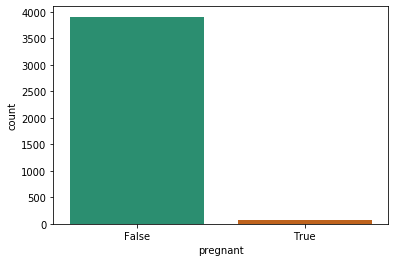

In [266]:
sns.countplot(data=data,x="pregnant",palette=("Dark2"))

Zo stĺpcového diagramu teda vidíme, že vačšina pacientov nie je tehotná.
<br>Pri čistení hodnôt sme však našli aj prázdne hodnoty, čiastočne by sme navrhovali napríklad nastavenie hodnoty False tým riadkom ktoré majú hodnotu atribútu **relationship** "Husband" alebo, ktoré po spojení tabuliek budú mať atribút **sex** nastavený na hodnotu "Male" 

In [267]:
print("Počet chýbajúcich hodnôt v atribúte pregnant: %d"%data.pregnant.isnull().sum())

Počet chýbajúcich hodnôt v atribúte pregnant: 12


Atribút **education-num**
- je kategorický atribút reprezentovaný číselne, t. j. čísla len kódujú kategóriu atribútu education
- pravdepodobne číslo vyjadruje sčítanosť, najvyššie dosiahnuté vzdelanie pacienta
- taktiež obsahuje prázdne dáta, možnosť nahradenia mediánom, alebo vypočítať číslo podľa atribútu education 

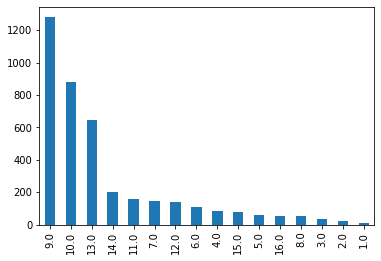

In [268]:
data['education-num'].value_counts().plot.bar()

Zo stĺpcového diagramu vidíme, že medzi pacientami prevláda číslo 9 - pravdepodobne to reprezentuje hodnotu 'HS-grad' ktora je najpocetnejsiou v atribute education

In [269]:
print("Počet chýbajúcich hodnôt v atribúte education-num: %d"%data['education-num'].isnull().sum())


Počet chýbajúcich hodnôt v atribúte education-num: 18


Atribút **relationship**
 - je to kategorický atribút vyjadrujúci vzťah pacienta
 - dáta sú typu string, a sú pomerne čisté, nie je potreba ich s výnimkou odstránenia whitespace upravovať
 - obsahuje zopár chýbajúcich hodnot, ale číslo je zanedbateľné

In [270]:
data.relationship.describe()

count         3970
unique           6
top        Husband
freq          1649
Name: relationship, dtype: object

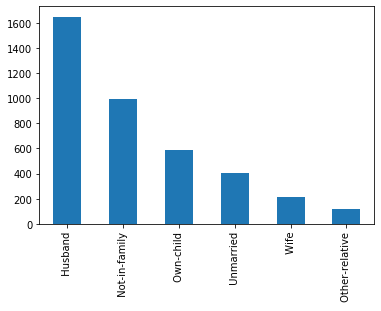

In [271]:
data.relationship.value_counts().plot.bar()

Vidíme ze v našom datasete prevládaju pacienti, muži, ktorí sú zároveň manželia.

In [272]:
print("Počet chýbajúcich hodnôt v atribúte relationship: %d"%data.relationship.isnull().sum())

Počet chýbajúcich hodnôt v atribúte relationship: 13


Atribút **skewness_glucose**
- atribút vyjadruje koeficient asymetrie rozdelenia meraných hodnôt glukózy v krvi pacienta
- spojitý číselný atribút, vykonávame deskriptívne štatistiky
- nie všetky hodnoty sú vyplnené


In [273]:
data.skewness_glucose.describe()

count    3960.000000
mean        4.242530
std         9.706012
min        -1.755332
25%        -0.120081
50%         0.374657
75%         2.091543
max        68.101622
Name: skewness_glucose, dtype: float64

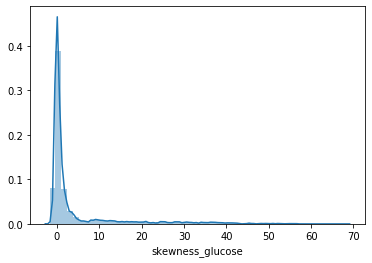

In [274]:
sns.distplot(data.skewness_glucose.dropna())

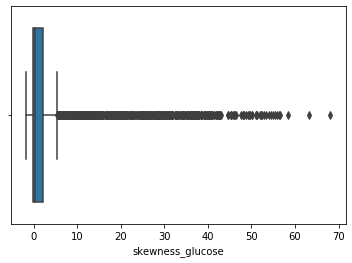

In [275]:
sns.boxplot(data.skewness_glucose.dropna())

Z grafov i štatistík môžme vidieť, že medzikvartilové rozpätie je pomerne úzke, s mediánom okolo 0, čiže väčšina pacientov má skoro symetrické rozdelenie hodnôt po meraní hladiny glukózy v krvi.
<br>Avšak,v dátach máme veľký počet outlierov. 

In [276]:
outliers_sg = outliers("skewness_glucose")
print("Počet outlierov v atribúte skewness_glucose je %d"%len(outliers_sg))

Počet outlierov v atribúte skewness_glucose je 685


In [277]:
print("Počet chýbajúcich hodnôt v atribúte skewness_glucose: %d"%data.skewness_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte skewness_glucose: 23


Atribút **mean_glucose**
- opäť číselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje medián, strednú hodnotu v meraniach hodnoty glukózy v krvi pacienta
- obsahuje prázdne hodnoty

In [278]:
data.mean_glucose.describe()

count    3973.000000
mean      101.248940
std        33.601519
min         6.187500
25%        87.742188
50%       110.664062
75%       124.132812
max       189.734375
Name: mean_glucose, dtype: float64

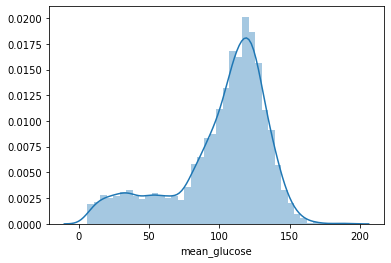

In [279]:
sns.distplot(data.mean_glucose.dropna())

Z distplotu vidíme, že hodnoty nemajú normálne rozdelenie, tym pádom v budúcnosti budeme musieť pravdepodobne tieto dáta normalizovať.

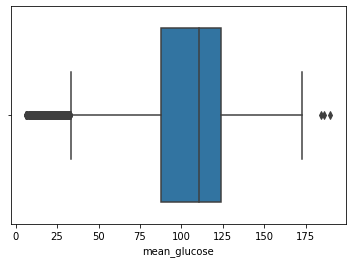

In [280]:
sns.boxplot(data.mean_glucose.dropna())

Z boxplotu vidíme, že v atribúte máme výrazných outlierov.

In [281]:
outliers_mg = outliers("mean_glucose")
print("Počet outlierov v atribúte mean_glucose je %d"%len(outliers_mg))

Počet outlierov v atribúte mean_glucose je 275


In [282]:
print("Počet chýbajúcich hodnôt v atribúte mean_glucose: %d"%data.mean_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_glucose: 10


Atribút **std_oxygen**
- je spojitý číselný atribút
- smerodajná odchýlka od normalneho rozdelenia hodnot nameraného kyslíku v krvi
- obsahuje aj chýbajúce hodnoty 

In [283]:
data.std_oxygen.describe()

count    3969.000000
mean       31.148558
std        22.263993
min         7.370432
25%        15.024700
50%        20.547873
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64

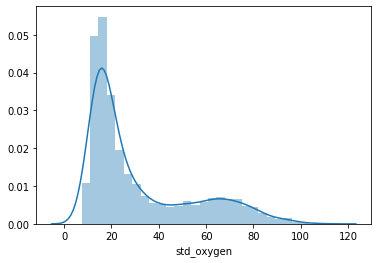

In [284]:
sns.distplot(data.std_oxygen.dropna())

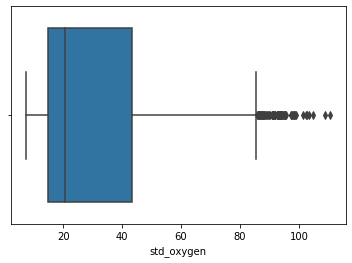

In [285]:
sns.boxplot(data.std_oxygen.dropna())


Z boxplotu vidíme, že v atribúte máme výrazných outlierov.

In [286]:
outliers_so = outliers("std_oxygen")
print("Počet outlierov v atribúte std_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte std_oxygen je 78


In [287]:
print("Počet chýbajúcich hodnôt v atribúte std_oxygen: %d"%data.std_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte std_oxygen: 14


Atribút **capital-gain**
- atribút vyjadrujúci nárast kapitálu
- nie je potrebný pre medicínske dáta
- čísený spojitý atribút

In [288]:
data['capital-gain'].describe()

count     3967.000000
mean      1042.988908
std       7006.726961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

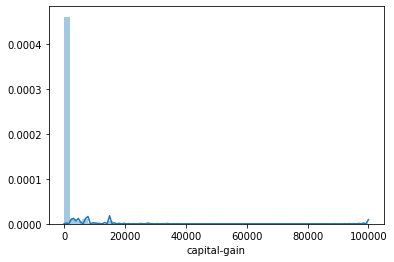

In [289]:
sns.distplot(data['capital-gain'].dropna())

Podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že väčšina prvkov sa rovná nule.
Pravdepodobne tento atribút nebude až tak dôležitý, v ďalšej fáze uvidíme čo s ním urobíme. 

In [290]:
print("Pomer počtu nulových záznamov atribútu voči iným hodnotám je " + str(len(data[data['capital-gain'] == 0])) + ":" + str(len(data[np.isfinite(data['capital-gain']) & data['capital-gain'] > 0])))
print("Počet chýbajúcich hodnôt v atribúte capital-gain: %d"%data['capital-gain'].isnull().sum())


Pomer počtu nulových záznamov atribútu voči iným hodnotám je 3633:334
Počet chýbajúcich hodnôt v atribúte capital-gain: 16


Atribút **skewness_oxygen**
- atribút vyjadruje koeficient asymetrie rozdelenia meraných hodnôt kyslíku v krvi pacienta
- spojitý číselný atribút, vykonávame deskriptívne štatistiky
- nie všetky hodnoty sú vyplnené


In [291]:
data.skewness_oxygen.describe()

count    3970.000000
mean       91.370712
std       108.475749
min        -1.976976
25%        12.858504
50%        68.623477
75%       127.236918
max      1191.000837
Name: skewness_oxygen, dtype: float64

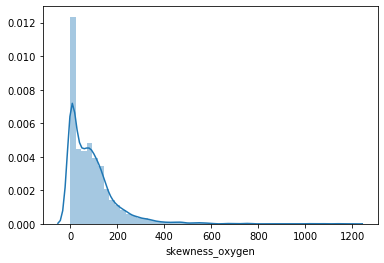

In [292]:
sns.distplot(data.skewness_oxygen.dropna())

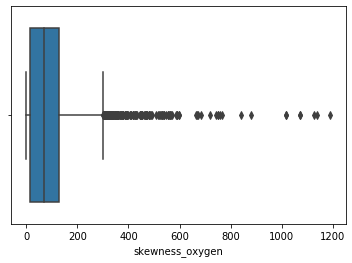

In [293]:
sns.boxplot(data.skewness_oxygen.dropna())

Z boxplot grafu je zrejmé že v dátach je veľký počet outlierov. 

In [294]:
outliers_so = outliers("skewness_oxygen")
print("Počet outlierov v atribúte skewness_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte skewness_oxygen je 162


In [295]:
print("Počet chýbajúcich hodnôt v atribúte skewness_oxygen: %d"%data.skewness_oxygen.isnull().sum())


Počet chýbajúcich hodnôt v atribúte skewness_oxygen: 13


Atribút **kurtosis_glucose**
 - je to spojitý číselný atribút nad ktorým môžme vykonávať deskriptívnu štatistiku
 - je to koeficient špicatosti distribúcie dát o hodnote glukózy v krvi daného pacienta
 - atribút je typu float
 - obsahuje chýbajúce hodnoty, vhodnou korekciou je nahradenie prázdnych hodnôt mediánom


In [296]:
data.kurtosis_glucose.describe()

count    3965.000000
mean        0.950507
std         1.611069
min        -1.641515
25%         0.072144
50%         0.310372
75%         0.775684
max         8.069522
Name: kurtosis_glucose, dtype: float64

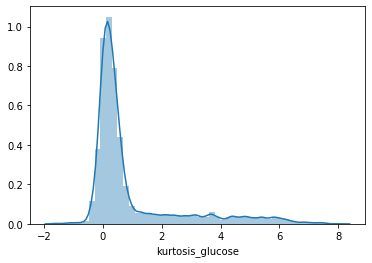

In [297]:
sns.distplot(data.kurtosis_glucose.dropna())

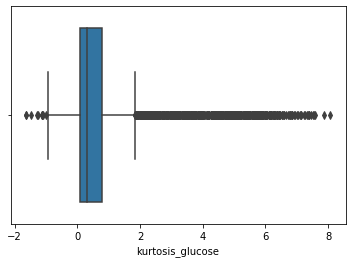

In [298]:
sns.boxplot(data.kurtosis_glucose.dropna())

Ako aj pri iných atribútoch, aj pri tomto je  v dátach veľký počet outlierov. 

In [299]:
outliers_kg = outliers("kurtosis_glucose")
print("Počet outlierov v atribúte kurtosis_glucose je %d"%len(outliers_kg))

Počet outlierov v atribúte kurtosis_glucose je 709


In [300]:
print("Počet chýbajúcich hodnôt v atribúte kurtosis_glucose: %d"%data.kurtosis_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte kurtosis_glucose: 18


Atribút **personal_info**
 - je to komplexný atribút typu string, v ktorom sa nachádza viacero hodnôt
 - bude treba v ďalšej časti tento atribút rozparsovať
 - na prvý pohľad v dátach existuje povolanie, štát, vzťah, dáta o práci a farba pleti
 - informácie o vzťahu by nám mohli pomôcť naplniť prázdne hodnoty v atribúte **relationship**
 - niektoré záznamy však taktiež obsahujú prázdne hodnoty

In [301]:
data.personal_info.head(5)

0    Prof-specialty|United-States\r\r\nMarried-civ-...
1    Prof-specialty|United-States\r\r\nNever-marrie...
2    Other-service|Mexico\r\r\nSeparated -- Private...
3    Prof-specialty|Canada\r\r\nNever-married -- Pr...
4    Sales|United-States\r\r\nMarried-civ-spouse --...
Name: personal_info, dtype: object

In [302]:
print("Počet chýbajúcich hodnôt v atribúte personal_info: %d"%data.personal_info.isnull().sum())

Počet chýbajúcich hodnôt v atribúte personal_info: 12


Je teda nutné sparsovať tento atribút do viacerých nových atribútov:

In [303]:
def parse_personal_info(personal_info):
    try:    
        return np.array(personal_info.replace(' -- ', ',').replace('|', ',').replace('\r\r\n', ',').split(','))
    except AttributeError:
        return None
    
def remove_empty(arr):
        if arr is not None:
            empty = ['?','??']
            for i in range(0,len(arr)):
                if (arr[i] != None):
                    if arr[i] in empty:
                        arr[i] = None
        return arr
    
def fill_value(number,arr):
    if arr is not None:
        return arr[number]


In [304]:
parsed_info = data.personal_info.apply(parse_personal_info).apply(remove_empty)

for index,name in enumerate(['employment','country','relationship_info','employment_info','race']):
    data[name] = parsed_info.apply(lambda x: fill_value(index,x))

Atribút **education**
- kategorický atribút nadobúdajúci 16 rôznych hodnôt
- zrejme vyjadruje stupeň najvyššieho dosiahnutého vzdelania

In [305]:
len(data.education.dropna().unique())

16

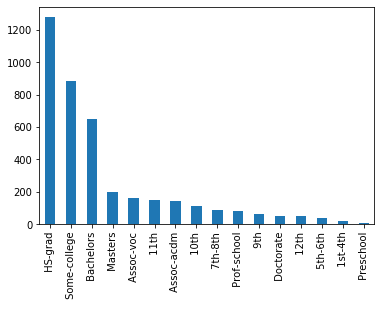

In [306]:
data.education.value_counts().plot.bar()

Ako môžme vidieť z grafu, v datasete máme najviac pacientov s najvyšším dosiahnutím "High School graduate"

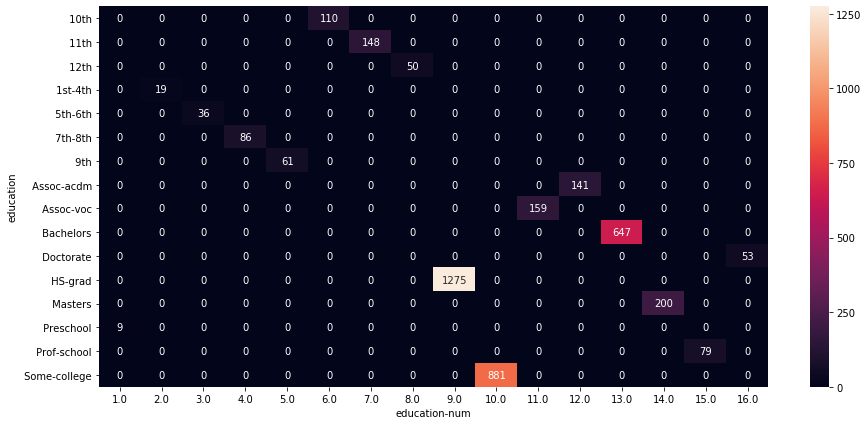

In [307]:
education_table = pd.crosstab(index=data.education,columns=data['education-num'])
fig,ax = plt.subplots(figsize=(15,7))

sns.heatmap(education_table, annot=True, fmt="d",ax=ax)

Pomocou heatmapy sme dokázali vzťah medzi závislosť medzi atribútmi education-num a education, kde education-num je číselnou reprezentáciou atribútu education.

In [308]:
print("Počet chýbajúcich hodnôt v atribúte education: %d"%data.education.isnull().sum())

Počet chýbajúcich hodnôt v atribúte education: 12


Atribút **fnlwgt**
- spojitý celočíselný atribút
- podľa hľadaní na internete vyjadruje atribút final weight určený organizáciou Census
- nie je relevatný s medicínskymi dátami

In [309]:
data.fnlwgt.describe()

count      3970.000000
mean     192967.197985
std      103285.567216
min       19214.000000
25%      120960.000000
50%      182045.000000
75%      241631.000000
max      889965.000000
Name: fnlwgt, dtype: float64

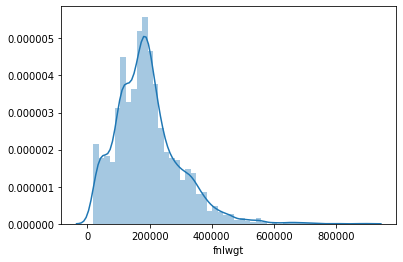

In [310]:
sns.distplot(data.fnlwgt.dropna())

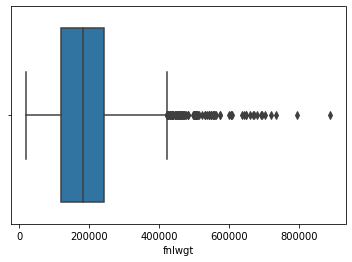

In [311]:
sns.boxplot(data.fnlwgt.dropna())

Z boxplotu vidíme, že atribút má veľa outlierov. Zistíme teda ktoré to sú a ich počet.

In [312]:
outliers_fnl = outliers("fnlwgt")
print("Počet outlierov v atribúte fnlwgt je %d"%len(outliers_fnl))

Počet outlierov v atribúte fnlwgt je 116


In [313]:
print("Počet chýbajúcich hodnôt v atribúte fnlwgt: %d"%data.fnlwgt.isnull().sum())

Počet chýbajúcich hodnôt v atribúte fnlwgt: 13


Atribút **class**
- ide o kategorický binárny atribút
- vyjadruje či je pacient chorý alebo zdravý
- nadobúda len dve hodnoty, 0 a 1
- nachádzajú sa tu aj prázdne hodnoty, korekcia: dopočítať na základe ostatných atribútov o hladine glukózy a kyslíku v krvi

In [314]:
data['class'].unique()

array([ 0.,  1., nan])

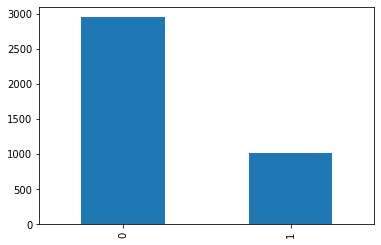

In [315]:
data['class'].dropna().astype(int).value_counts().plot.bar()

Atribút **std_glucose**
- ide o spojitý číselný atribút
- smerodajná odchýlka od normalneho rozdelenia hodnot nameranej glukózy v krvi
- obsahuje aj chýbajúce hodnoty

In [316]:
data.std_glucose.describe()

count    3971.000000
mean       74.479764
std      1448.165852
min     -8305.388133
25%        39.502222
50%        45.928079
75%        51.048246
max      6649.471314
Name: std_glucose, dtype: float64

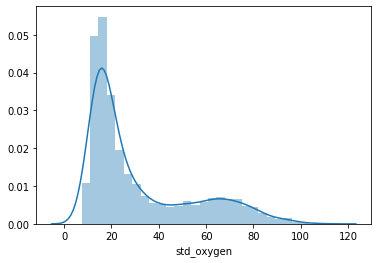

In [317]:
sns.distplot(data.std_oxygen.dropna())

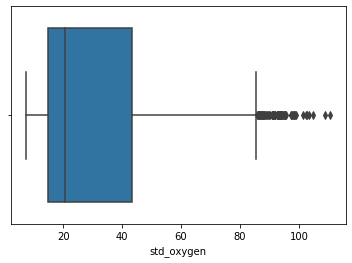

In [318]:
sns.boxplot(data.std_oxygen.dropna())

Opäť, podľa grafu je vidno že aj tento atribút má veľký počet outlierov.

In [319]:
outliers_so = outliers("std_oxygen")
print("Počet outlierov v atribúte std_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte std_oxygen je 78


In [320]:
print("Počet chýbajúcich hodnôt v atribúte std_oxygen: %d"%data.std_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte std_oxygen: 14


Atribút **income**
- ide o kategorický atribút
- vyjadruje zárobok pacienta (ročný)
- zobrazuje dve možné hodnoty, menej alebo rovné 50 tisíc (K) alebo viac
- niektoré záznamy obsahujú aj prázdne hodnoty
- korekcia: premeniť atribút na binárny

In [321]:
data.income.unique()

array([' >50K', ' <=50K', nan], dtype=object)

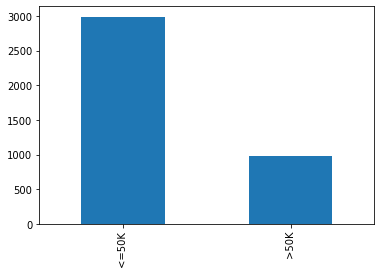

In [322]:
data.income.dropna().value_counts().plot.bar()

In [323]:
print("Počet chýbajúcich hodnôt v atribúte income: %d"%data.income.isnull().sum())

Počet chýbajúcich hodnôt v atribúte income: 14


Z grafu teda vidíme, že väčšina pacientov z nášho datasetu zarába pod 50 tisíc.

Atribút **mean_oxygen**
- číselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje medián, strednú hodnotu v meraniach hodnoty kyslíku v krvi pacienta
- obsahuje aj prázdne hodnoty

In [324]:
data.mean_oxygen.describe()

count    3967.000000
mean       18.470601
std        34.808695
min         0.213211
25%         2.061873
50%         3.223244
75%        12.610786
max       217.371238
Name: mean_oxygen, dtype: float64

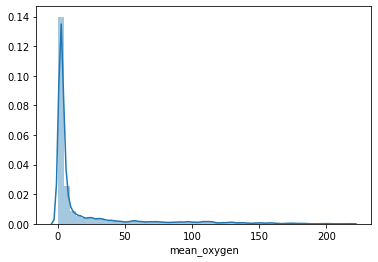

In [325]:
sns.distplot(data.mean_oxygen.dropna())



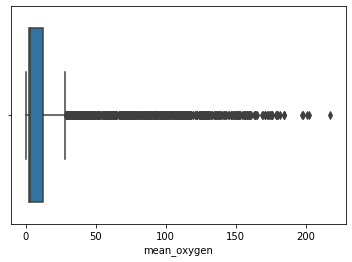

In [326]:
sns.boxplot(data.mean_oxygen.dropna())

Podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že äčšina prvkou je málo vyššia od nuly. Z boxplotu vidíme úzky pás medzikvartilového rozpätia a veľký počet outlierov.

In [327]:
outliers_mo = outliers("mean_oxygen")
print("Počet outlierov v atribúte mean_oxygen je %d"%len(outliers_mo))

Počet outlierov v atribúte mean_oxygen je 703


In [328]:
print("Počet chýbajúcich hodnôt v atribúte mean_oxygen: %d"%data.mean_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_oxygen: 16


Atribút **hours-per-week**
- celočíselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje počet odpracovaných hodín pacienta za týžde§
- obsahuje aj prázdne hodnoty

In [329]:
data['hours-per-week'].describe()


count    3970.000000
mean       40.568766
std        12.601133
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64

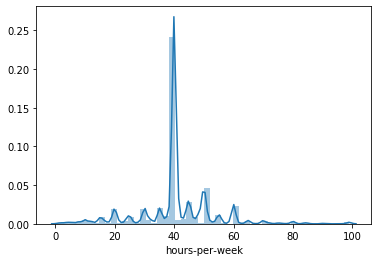

In [330]:
sns.distplot(data['hours-per-week'].dropna())

Vidíme, že väčšina pacientov sa nachádza okolo hodnoty 40 hodín týždenne.

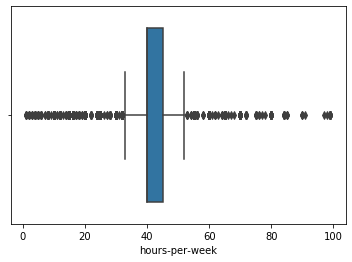

In [331]:
sns.boxplot(data['hours-per-week'].dropna())

Z boxplotu vidíme veľa outlierov na oboch koncoch medzikvartilového ropätia. Zistíme ktorí sú to a taktiež aj ich počet.


In [332]:
outliers_hpw = outliers("hours-per-week")
print("Počet outlierov v atribúte hours-per-week je %d"%len(outliers_hpw))

Počet outlierov v atribúte hours-per-week je 1098


In [333]:
print("Počet chýbajúcich hodnôt v atribúte mean_oxygen: %d"%data.mean_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_oxygen: 16


Atribút **capital-loss**
- atribút vyjadrujúci pokles kapitálu
- čísený spojitý atribút, urobíme deskriptívnu štatistiku

In [334]:
data['capital-loss'].describe()

count    3963.000000
mean       80.275549
std       388.336046
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3770.000000
Name: capital-loss, dtype: float64

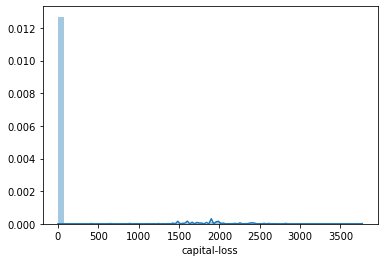

In [335]:
sns.distplot(data['capital-loss'].dropna())


Opäť ako aj pri atribúte capital_loss podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že väčšina prvkov sa rovná nule. 
Pravdepodobne tento atribút nemá pacientmi vyplnený.

In [336]:
print("Pomer počtu nulových záznamov atribútu voči iným hodnotám je " + str(len(data[data['capital-loss'] == 0])) + ":" + str(len(data[np.isfinite(data['capital-loss']) & data['capital-loss'] > 0])))
print("Počet chýbajúcich hodnôt v atribúte capital-gain: %d"%data['capital-loss'].isnull().sum())

Pomer počtu nulových záznamov atribútu voči iným hodnotám je 3793:170
Počet chýbajúcich hodnôt v atribúte capital-gain: 20


### Zisťovanie duplicitných riadkov

In [337]:
duplicatedRows = data[data.duplicated(keep='last')]

In [338]:
if (len(duplicatedRows)):
    print("Dataframe obsahuje %d duplicitnych riadkov"%len(duplicatedRows))
else:
    print("Dataframe neobsahuje ziadne duplicitne riadkv")    


Dataframe neobsahuje ziadne duplicitne riadkv


## Párová analýza dát
### Zisťovanie korelacií spojitych hodnôt v druhom datasete pomocou heatmapy

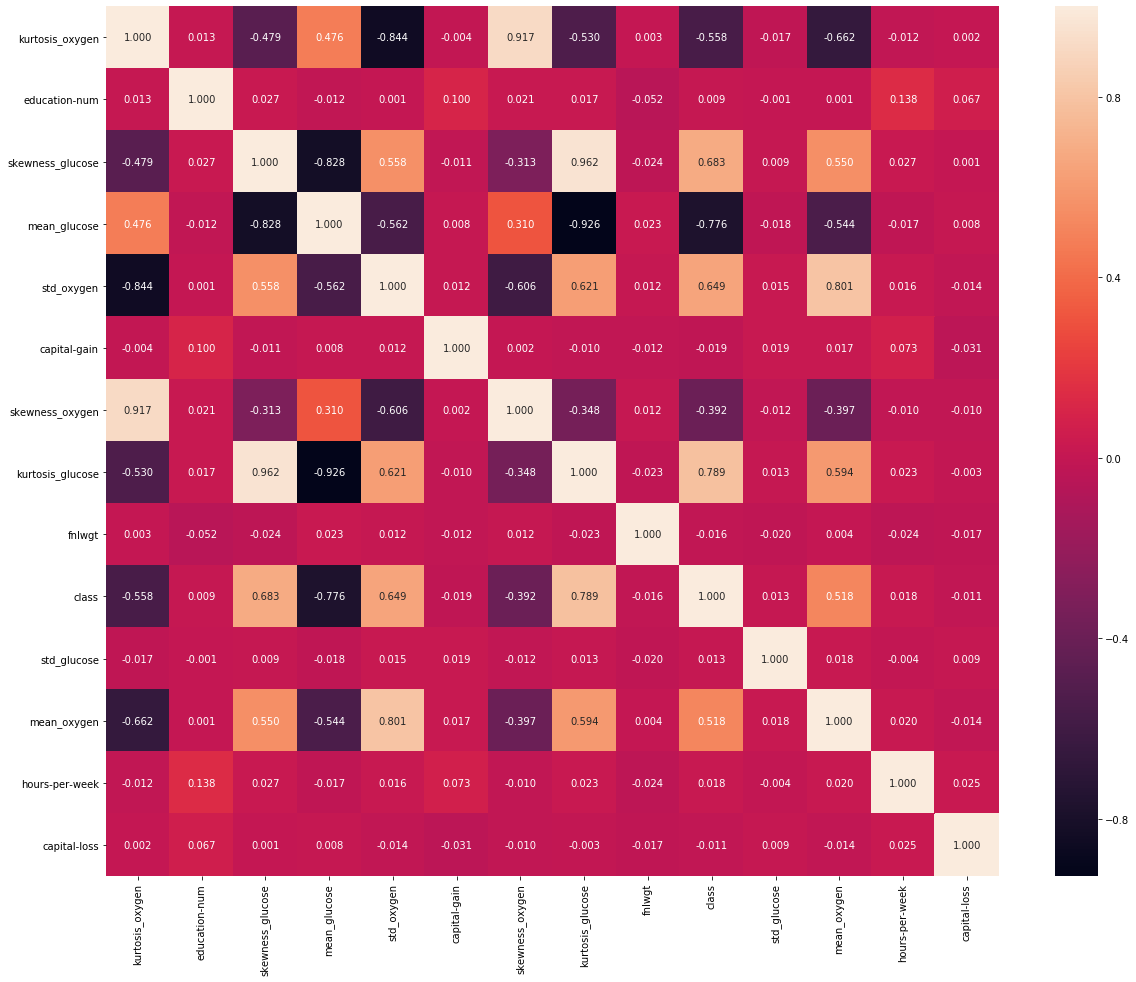

In [339]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(data.corr(),ax=ax, annot =True, fmt = ".3f")

#### Z heatmapy citame nasledovne:
- tak ako sme predpokladali, hodnota atributov capital-gain a capital-loss je vo vacsine zaznamov nulova, tym padom aj korelacia tychto atributov s inym atributmi je nulova
- nizku korelaciu maju atributy class a mean_glucose
- vysoku korelaciu vidime medzi atributami kurtosis_glucose a skewness_glucose
- medzi atributom class a kurtosis_glucose je pomerne vysoka korelacia
- vyssia korelacia je aj medzi mean_oxygen mean_oxygen

#### Z tabulky tatktiez vidime, ze nas pri klasifikacii bude zaujimat skor hodnota skewness_glucose a kurtosis_glucose pred mean_glucose pretoze tam je vyssia korelacia. 


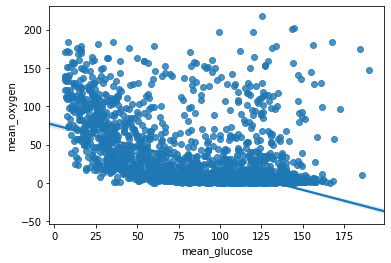

In [340]:
sns.regplot(x="mean_glucose",y="mean_oxygen",data=data)

Graf vyjadruje negatívnu koreláciu atribútov mean_oxygen a mean_glucose co mozeme vidiet aj v heatmape.

In [341]:
data.mean_glucose.corr(data.mean_oxygen)

-0.5436664488609989

<br>

In [342]:
glycemia = pd.crosstab(index=data["class"], columns=data["employment"])
glycemia.index=["0", "1"]
glycemia

employment,Adm-clerical,Adm_clerical,Armed-Forces,Craft-repair,Craft_repair,Exec-managerial,Exec_managerial,Farming-fishing,Farming_fishing,Handlers-cleaners,...,Priv_house_serv,Prof-specialty,Prof_specialty,Protective-serv,Protective_serv,Sales,Tech-support,Tech_support,Transport-moving,Transport_moving
0,275,36,0,337,34,315,38,80,7,133,...,2,367,46,35,8,330,60,14,131,11
1,123,9,1,105,12,110,17,31,0,43,...,1,119,7,22,1,117,21,4,51,2


Tu možeme vidieť, že zamestnanie nemá vplyv na to či človek má alebo nemá cukrovku, všade je približne rovnaký pomer medzi zdravými a chorými

In [343]:
pregnancy = pd.crosstab(index=data.pregnant, columns=data["class"])
pregnancy.index=[False, True]
pregnancy

class,0.0,1.0
False,2891,1000
True,52,11


Vplyv tehotenstva taktiež na cukrovku nemá vplyv

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

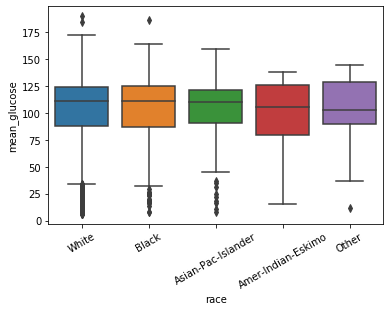

In [344]:
sns.boxplot('race','mean_glucose', data=data)
pylab.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

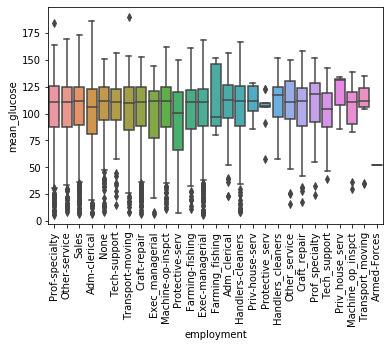

In [345]:
sns.boxplot('employment','mean_glucose', data=data)
pylab.xticks(rotation=90)

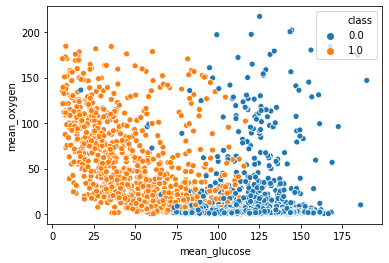

In [346]:
sns.scatterplot(data['mean_glucose'], data['mean_oxygen'], hue=data['class'])

/Users/feri/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/feri/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


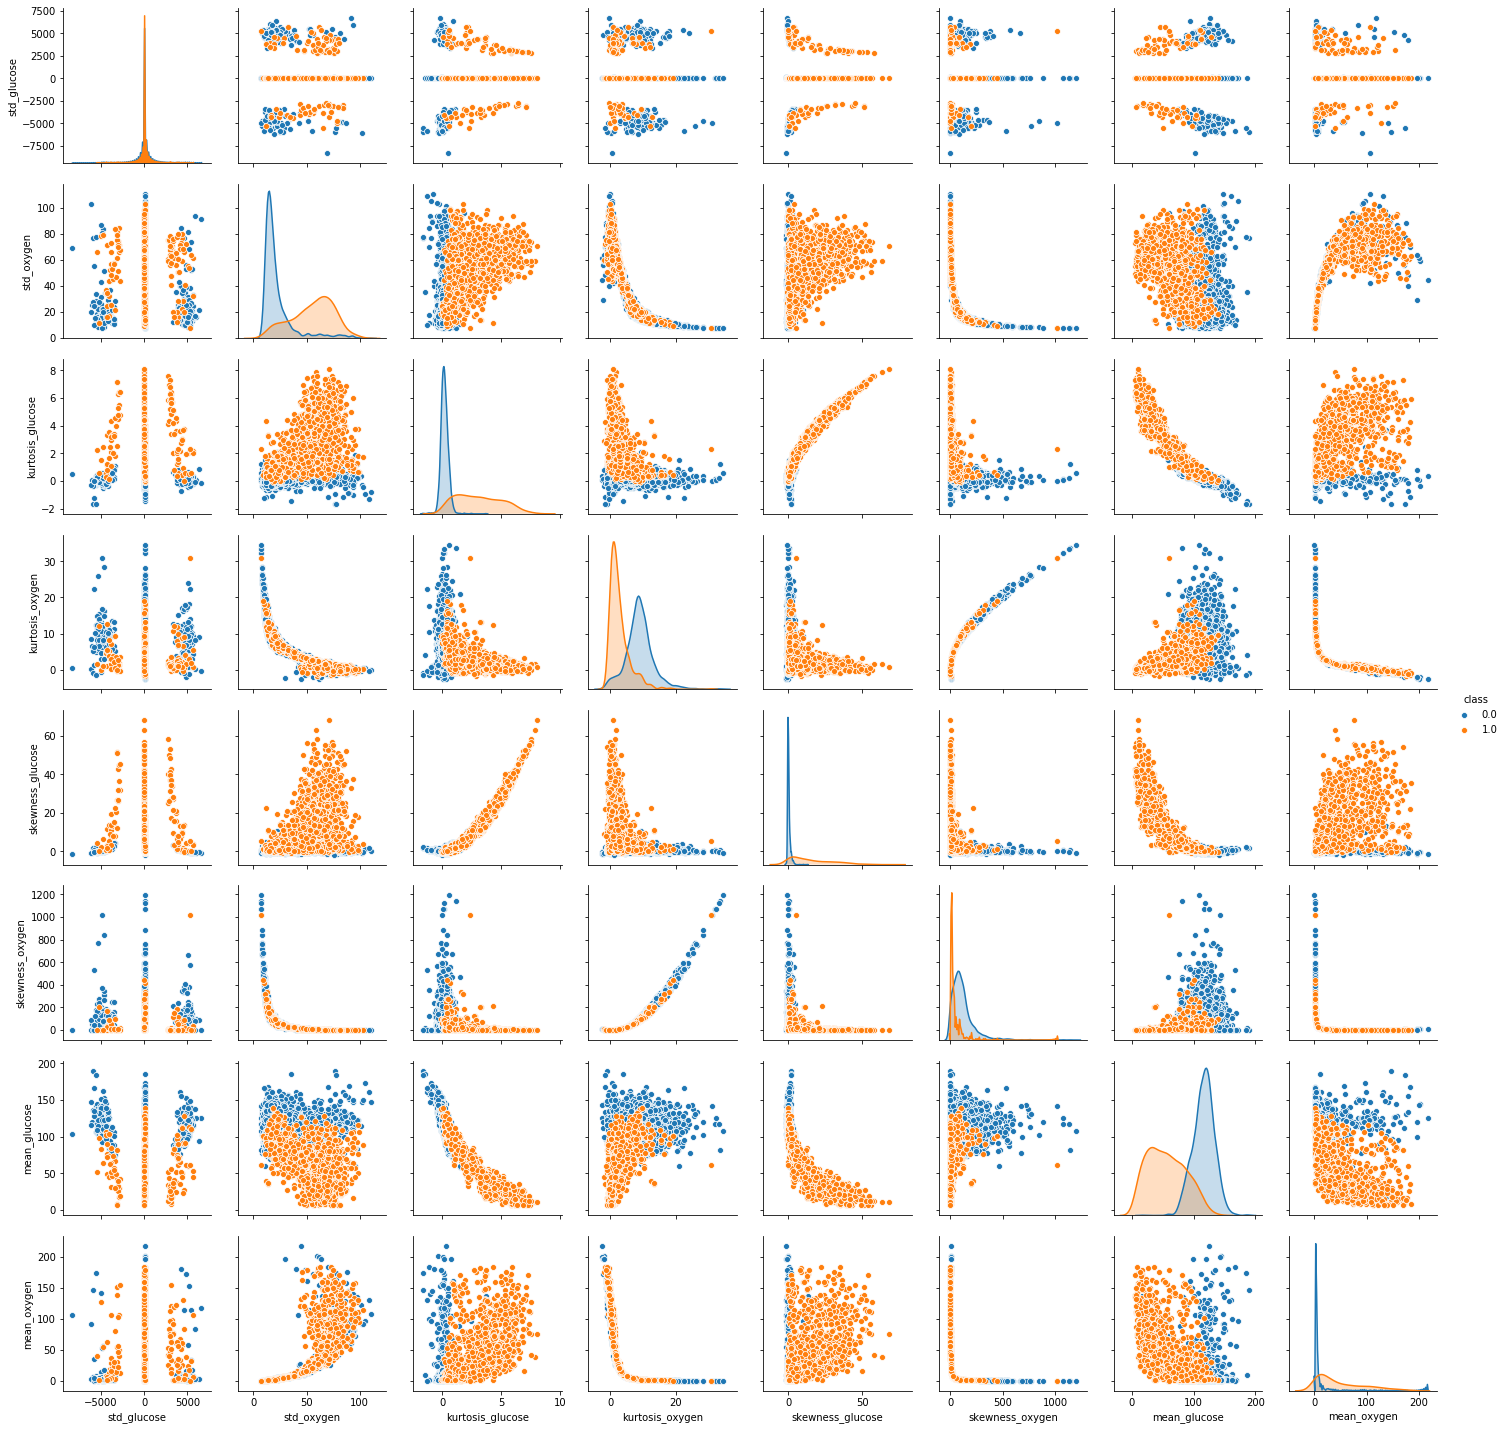

In [347]:
sns.pairplot(data, vars=['std_glucose','std_oxygen', 'kurtosis_glucose','kurtosis_oxygen','skewness_glucose','skewness_oxygen','mean_glucose','mean_oxygen'], hue="class", diag_kind="kde")

## Formulácia a štatistické overenie hypotéz o dátach

### HYPOTEZA: Ak je hodnota atributu skewness_glucose do 5 tak je pacient pravdepodobne zdravy

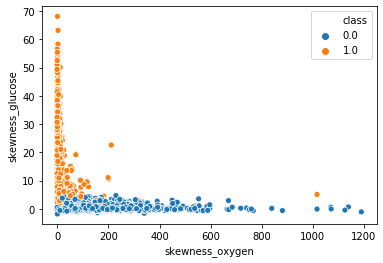

In [348]:
sns.scatterplot(data['skewness_oxygen'], data['skewness_glucose'], hue=data['class'])

## Overenie: 

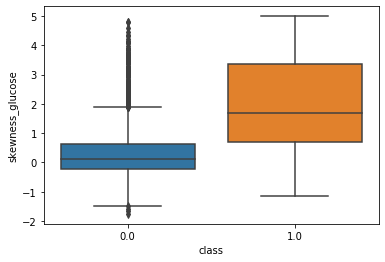

In [365]:
possibly_healthy = data[(data.skewness_glucose < 5)]
sns.boxplot('class','skewness_glucose', data=possibly_healthy)

In [366]:
possibly_healthy["class"].value_counts()

0.0    2933
1.0     314
Name: class, dtype: int64

Vytiahneme si hodnoty skewness glucose u zdravych aj chorych pacientov

In [367]:
healthy = possibly_healthy[possibly_healthy['class']==0].skewness_glucose
ill = possibly_healthy[possibly_healthy['class']==1].skewness_glucose

Urobime deskriptivne statistiky nad oboma atributmi tychto dvoch skupin pacientov

In [368]:
healthy.describe()

count    2933.000000
mean        0.341341
std         0.863519
min        -1.755332
25%        -0.221498
50%         0.127061
75%         0.622287
max         4.795048
Name: skewness_glucose, dtype: float64

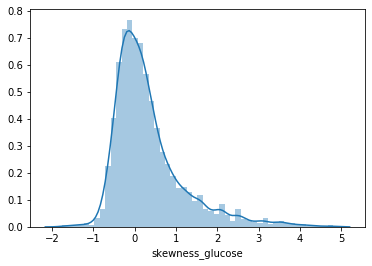

In [369]:
sns.distplot(healthy)

In [370]:
ill.describe()

count    314.000000
mean       1.964582
std        1.531471
min       -1.139069
25%        0.692794
50%        1.700787
75%        3.361150
max        4.992276
Name: skewness_glucose, dtype: float64

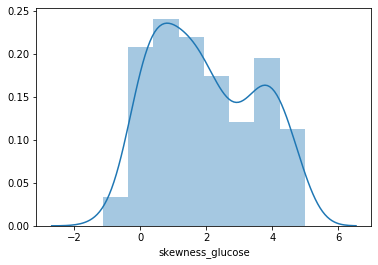

In [371]:
sns.distplot(ill)

Z grafov pravdepodobnostného rozdelenia i boxplotu vidíme, že v zvolených subsetoch dát máme veľa outlierov, preto sme sa ich na dokázanie tejto hypotézy rozhodli vynechať.

In [356]:
def iqr(attribute): 
    return attribute.quantile(0.75) - attribute.quantile(0.25) 

def outliers(attribute):
    iqrange = iqr(attribute)
    
    lower = attribute.quantile(0.25) - 1.5 * iqrange
    upper = attribute.quantile(0.75) + 1.5 * iqrange
   
    return attribute[(attribute > upper) | (attribute < lower)]

In [373]:
healthy_outliers = outliers(healthy)
ill_outliers = outliers(ill)

In [374]:
healthy = healthy.drop(healthy_outliers.index)
ill = ill.drop(ill_outliers.index)

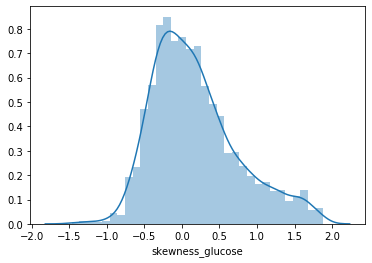

In [375]:
sns.distplot(healthy)

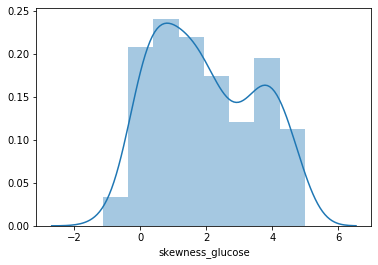

In [376]:
sns.distplot(ill)

Na grafoch môžme vidieť rozdelenie hodnôt po dropnutí outlierov.

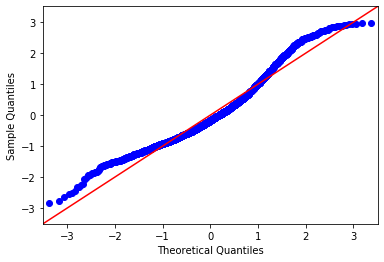

In [361]:
_ = sm.ProbPlot(healthy,fit=True).qqplot(line='45')

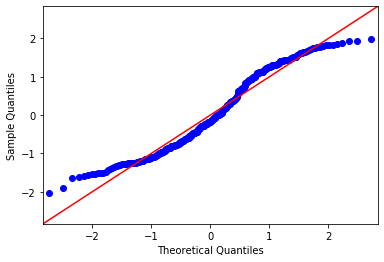

In [377]:
_ = sm.ProbPlot(ill,fit=True).qqplot(line='45')

QQ plot nám určuje, že obe dátové sady pochádzajú z rovnakého rozdelenia.
Musíme však overiť normálnosť.

In [378]:
stats.shapiro(healthy)

(0.9561063647270203, 6.061249646824079e-28)

In [379]:
stats.shapiro(ill)

(0.9526423811912537, 1.5745497350394544e-08)

Kedže p-hodnota oboch vzoriek je menšia ako 0.05, nulovú hypotézu zamietame a môžme považovať, že dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. 
Tým pádom môžeme povedať, že predpoklady na t test neboli splnené, a preto použijeme jeho neparametrickú verziu. 

In [380]:
stats.mannwhitneyu(healthy, ill)

MannwhitneyuResult(statistic=119239.0, pvalue=4.365054966552917e-98)

Man-Whiteneyho test nám vrátil pravdepodobnosť chyby 1. rádu ktorá je menšia ako 1 promile. Môžme teda tvrdiť, že rozdiel v chorých a zdravých pacientoch kde obe vzorky majú úroveň skewness_glucose menšiu ako 5 je signifikantný.

In [381]:
sms.DescrStatsW(healthy).tconfint_mean()

(0.15295047539796341, 0.19618311082450274)

In [382]:
sms.DescrStatsW(ill).tconfint_mean()

(1.7945330455766442, 2.1346314785953306)

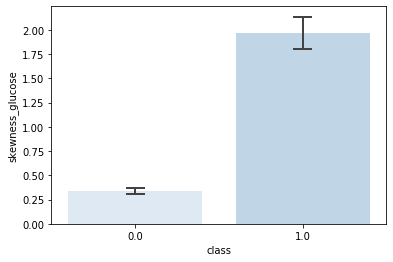

In [384]:
sns.barplot(x='class', y='skewness_glucose', data=possibly_healthy, 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

<br><br>

### HYPOTEZA: Rozdiel mean_glucose pri chorých a zdravych ľudoch je signifikantný

(array([0, 1]), <a list of 2 Text xticklabel objects>)

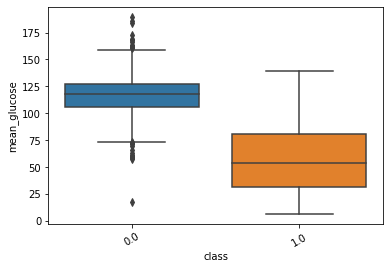

In [385]:
sns.boxplot('class','mean_glucose', data=data)
pylab.xticks(rotation=30)

Menši rozdiel tam vidíme, otestuje či je teda signifikantný.

### Overenie predpokladov
Vytiahneme si hodnoty mean_glucose u zdravych aj chorych pacientov a robime deskriptivne statistiky nad oboma atributmi tychto dvoch skupin pacientov

In [386]:
healthy = data[data['class']== 0].mean_glucose
healthy= healthy.dropna()
healthy.describe()

count    2945.000000
mean      116.520819
std        17.057391
min        17.210938
25%       105.859375
50%       117.523438
75%       127.648438
max       189.734375
Name: mean_glucose, dtype: float64

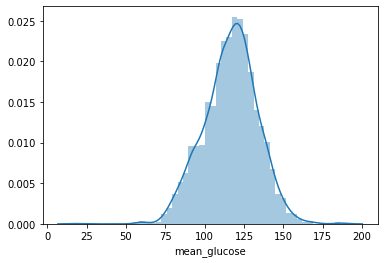

In [387]:
sns.distplot(healthy)

In [388]:
sick = data[data['class']== 1].mean_oxygen
sick = sick.dropna()
sick.describe()

count    1007.000000
mean       49.321959
std        45.558583
min         0.486622
25%        12.181856
50%        32.572742
75%        77.689381
max       184.525920
Name: mean_oxygen, dtype: float64

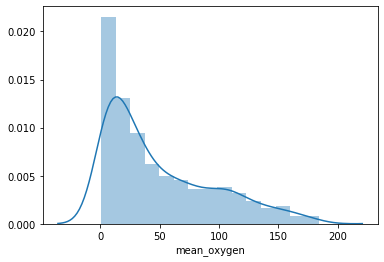

In [389]:
sns.distplot(sick)

Z grafov pravdepodobnostného rozdelenia i boxplotu vidíme, že v zvolených subsetoch dát máme veľa outlierov, preto sme sa ich na dokázanie tejto hypotézy rozhodli vynechať.

In [390]:
healthy_out = outliers(healthy)
healthy_out
sick_out = outliers(sick)
sick_out

61      176.119565
116     181.746656
2049    178.425585
2123    184.231605
2847    184.525920
3842    178.700669
Name: mean_oxygen, dtype: float64

In [391]:
healthy = healthy.drop(healthy_out.index)

In [392]:
sick = sick.drop(sick_out.index)

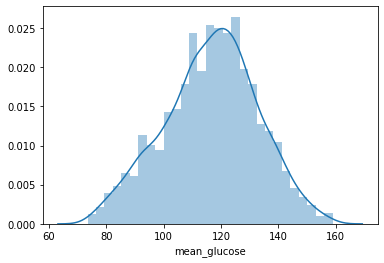

In [393]:
sns.distplot(healthy)

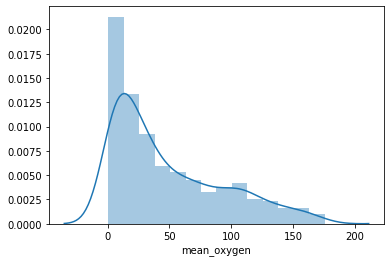

In [394]:
sns.distplot(sick)

Na grafoch môžme vidieť rozdelenie hodnôt po dropnutí outlierov.

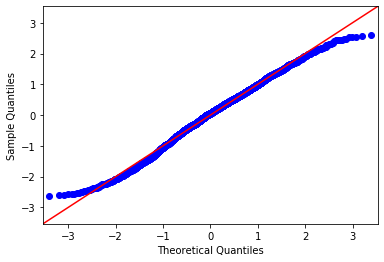

In [395]:
_ = sm.ProbPlot(healthy, fit=True).qqplot(line='45')

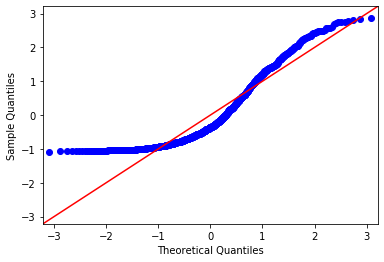

In [396]:
_ = sm.ProbPlot(sick, fit=True).qqplot(line='45')

QQ plot nám určuje, že obe dátové sady pochádzajú z rovnakého rozdelenia, sú light-tailed.
Musíme však overiť normálnosť.

In [397]:
stats.shapiro(healthy)

(0.9942792654037476, 2.9653224320469462e-09)

In [398]:
stats.shapiro(sick)

(0.8761560916900635, 1.8148222755235585e-27)

Kedže p-hodnota oboch vzoriek je menšia ako 0.05, nulovú hypotézu zamietame a môžme považovať, že dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. 
Tým pádom môžeme povedať, že predpoklady na t test neboli splnené, a preto použijeme jeho neparametrickú verziu. 

In [399]:
stats.levene(healthy, sick)


LeveneResult(statistic=1101.421210336636, pvalue=4.779645754922323e-213)

In [400]:
stats.mannwhitneyu(healthy, sick)

MannwhitneyuResult(statistic=329140.0, pvalue=7.041874729777556e-294)

Keďže p<0,001 pravdepodobnosť chyby 1. rádu je menej ako 1 promile. Rozdiel v mean_glukoze medzi chorými a zdravými ludmi je štatisticky viditelný.

In [401]:
sms.DescrStatsW(healthy).tconfint_mean()

(115.90415683938947, 117.0856443261916)

In [402]:
sms.DescrStatsW(sick).tconfint_mean()

(45.772323655603316, 51.29753290940967)

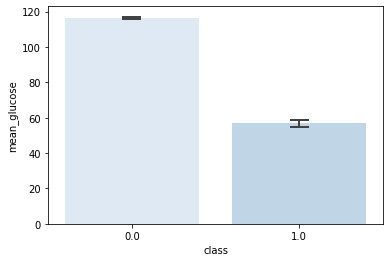

In [403]:
sns.barplot(x='class', y='mean_glucose', data=data[(data['class']== 0) | (data['class']== 1)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

### Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia 
- vsetky chyby a problemy dat boli spomenute vyssie v opisoch jednotlivych atributov

### Zhodnotenie
#### Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Niektore z dat maju vhodny format, v niektorych sa vsak nachadza zopar prazdnych hodnot. Pokial je pocet prazdnych hodnot prilis maly, vhodnou alternativou by bolo vyradenie tychto riadkov, alebo nahradenie priemerom.
- Niektore z dat boli komplexne, tzn. viacero atributov v jednom stlpci dataframu, co sme vyriesili vyparsovanim dat a vytvorenim novych stlpcov do ktorych sme hodnoty atributov danych zaznamov vlozili.
- Niektore z hodnot (napr) atribut pregnant, neobsahovali jednotne data - viacero roznych dat oznacovalo rovnaku hodnotu, co bolo vyriesene zjednotenim tychto dat pomocnou funkciou.
- V prvom datasete bol taktiez nejednotny atribut date_of_birth, ktory bude potreba zjednotit na unifikovany format.
- V hodnote novo vytvoreneho atributu employment taktiez existuju zaznamy reprezentujuce rovnaku hodnotu ktore sa vsak lisia syntakticky, a preto bude treba ich zjednotit.
<br>

#### Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- V datasete sme nasli zavislu premennu medzi education-num a education - kategoricka nominalna premenna education-num vyjadrovala atribut education ciselne
- Ine zavislosti boli vyjadrene v heatmape zavislosti jednotlivych atributov.
<br>

#### Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé  atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Napriklad, chybajuce hodnoty v atribute pregnant by mohli byt spravne nahradene hodnotou false, v pripade ze hodnota relationship konkretneho zaznamu je 'Husband' alebo ak by po mergnuti datasetov v prvom datasete existoval zaznam sex (pohlavie) pre rovnake meno v druhom datasete a hodnota tohto atributu by bola Male, mohli by sme usudit, ze chybajucu hodnotu atributu pregnant mozme nastavit na False
- ine chybajuce data a ich pocet v jednotlivych atributoch sme zistili v casti opisu atributov nasho datasetu
- navrhovana korekcia,uz vyssie spomenuta, bolo napriklad nahradit tieto prazdne hodnoty priemerom daneho atributu.
- Mnozstvo atributov obsahovalo nie prazdne, ale nezmyselne hodnoty - napriklad otazniky alebo whitespace znaky
<br>

#### Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ano, napriklad atribut age  v prvom datasete, obsahoval zaporne hodnoty 
- Vo viacerych atributoch existovalo vela extremne vychylenych hodnot (outlierov) ktore posuvali priemer daneho atributu (tito outlieri boli graficky zobrazeni pomocou boxplot grafov)

#### Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?
- Jednotlive identifikovane problemy atributov boli scasti uz riesene (napr. parsovanim komplexnych dat alebo unifikovanim hodnot niektorych atributov)
- Zvysne prazdne hodnoty ako bolo uz spominane, budu nahradene napriklad priemerom

<img src="https://dok7xy59qfw9h.cloudfront.net/1bf/8dd6c/7a45/451b/b4d1/cacacc280b52/large/1311493.jpg">
